In [2]:
import pandas as pd

In [3]:
df_concrete = pd.read_csv('concrete_data.csv')  # replace with your csv file path

# Display the first few rows to understand its structure
df_concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and Target
X = df_concrete.drop('Strength', axis=1)
y = df_concrete['Strength']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

mse

95.97094009110683

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

# Build the deep learning model
dl_model = Sequential()
dl_model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
dl_model.add(Dense(64, activation='relu'))
dl_model.add(Dense(1))

# Compile the model
dl_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
dl_model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions and evaluate the model
y_pred_dl = dl_model.predict(X_test)
mse_dl = mean_squared_error(y_test, y_pred_dl)

print("Deep Learning Model MSE:", mse_dl)

Epoch 1/50
26/26 [==============================] - 0s 1ms/step - loss: 1600.5315
Epoch 2/50
26/26 [==============================] - 0s 1ms/step - loss: 222.8490
Epoch 3/50
26/26 [==============================] - 0s 1ms/step - loss: 140.9250
Epoch 4/50
26/26 [==============================] - 0s 1ms/step - loss: 119.9987
Epoch 5/50
26/26 [==============================] - 0s 1ms/step - loss: 115.3035
Epoch 6/50
26/26 [==============================] - 0s 1ms/step - loss: 110.5103
Epoch 7/50
26/26 [==============================] - 0s 1ms/step - loss: 104.5853
Epoch 8/50
26/26 [==============================] - 0s 1ms/step - loss: 94.8520
Epoch 9/50
26/26 [==============================] - 0s 1ms/step - loss: 103.1754
Epoch 10/50
26/26 [==============================] - 0s 1ms/step - loss: 91.9813
Epoch 11/50
26/26 [==============================] - 0s 1ms/step - loss: 106.7101
Epoch 12/50
26/26 [==============================] - 0s 1ms/step - loss: 96.9474
Epoch 13/50
26/26 [========

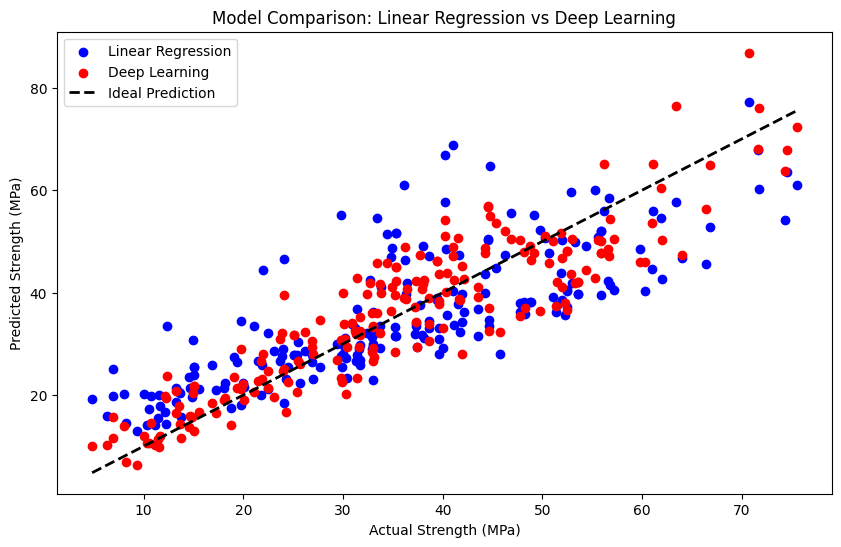

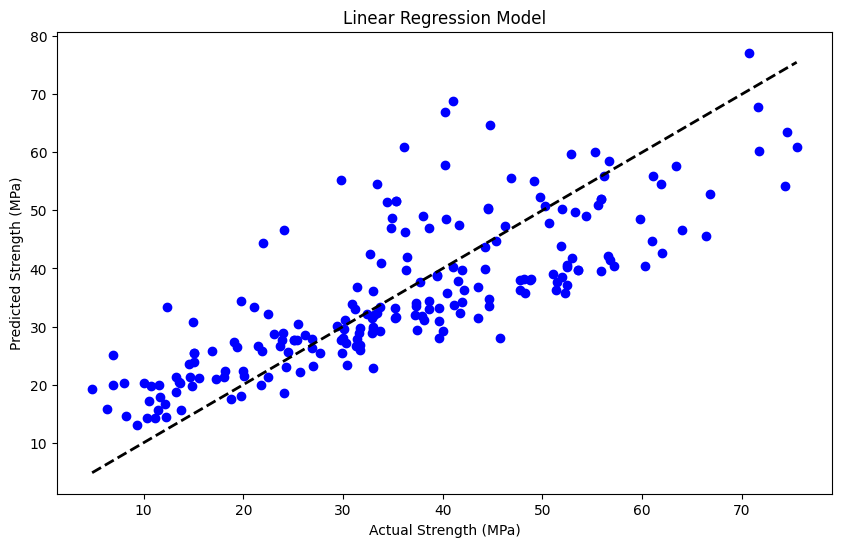

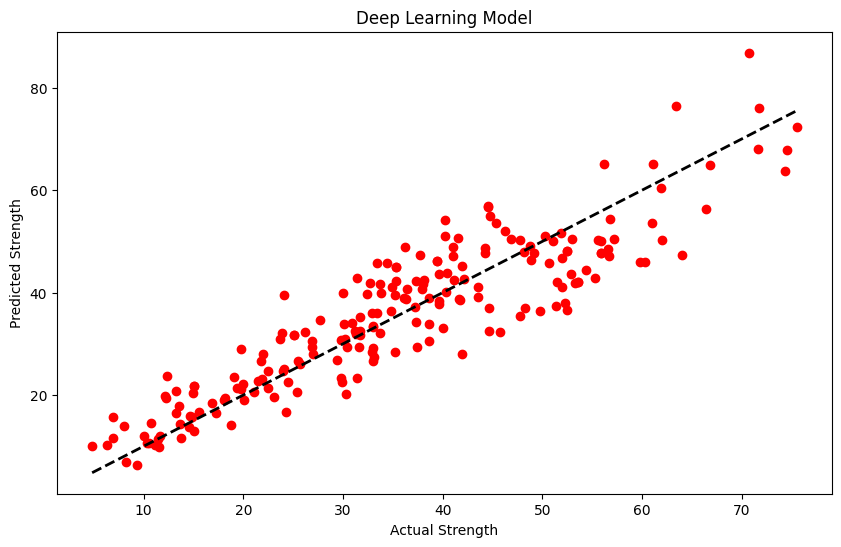

In [8]:
import matplotlib.pyplot as plt

# Linear Regression Predictions
y_pred_lr = model.predict(X_test)

# Deep Learning Predictions
# Assuming 'y_pred_dl' contains predictions from the deep learning model

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_dl, color='red', label='Deep Learning')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Ideal Prediction')
plt.xlabel('Actual Strength (MPa)')
plt.ylabel('Predicted Strength (MPa)')
plt.legend()
plt.title('Model Comparison: Linear Regression vs Deep Learning')
plt.show()

# Linear Regression Predictions
# Assuming 'y_pred_lr' contains predictions from the linear regression model

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Strength (MPa)')
plt.ylabel('Predicted Strength (MPa)')
plt.title('Linear Regression Model')
plt.show()

# Deep Learning Predictions
# Assuming 'y_pred_dl' contains predictions from the deep learning model

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dl, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Strength')
plt.ylabel('Predicted Strength')
plt.title('Deep Learning Model')
plt.show()

